In [1]:
import numpy as np
import matplotlib.pyplot as plt

## SIR Model

In [48]:
def model(init, params, T, dt):
    beta, gamma = params
    S0, I0, R0 = init
    N = S0 + I0 + R0
    
    S, I, R = [S0], [I0], [R0]
    for t in range(1, int(T / dt)):
        S_to_I = min(S[-1], (beta * S[-1] * I[-1] / N) * dt)
        I_to_R = min(I[-1], (gamma * I[-1]) * dt)
        
        next_S = S[-1] - S_to_I
        next_I = I[-1] + S_to_I - I_to_R
        next_R = R[-1] + I_to_R
        
        S.append(next_S)
        I.append(next_I)
        R.append(next_R)
        
    return np.stack([S, I, R])

/home/ridouane/anaconda3/envs/Computer-Vision-Python3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


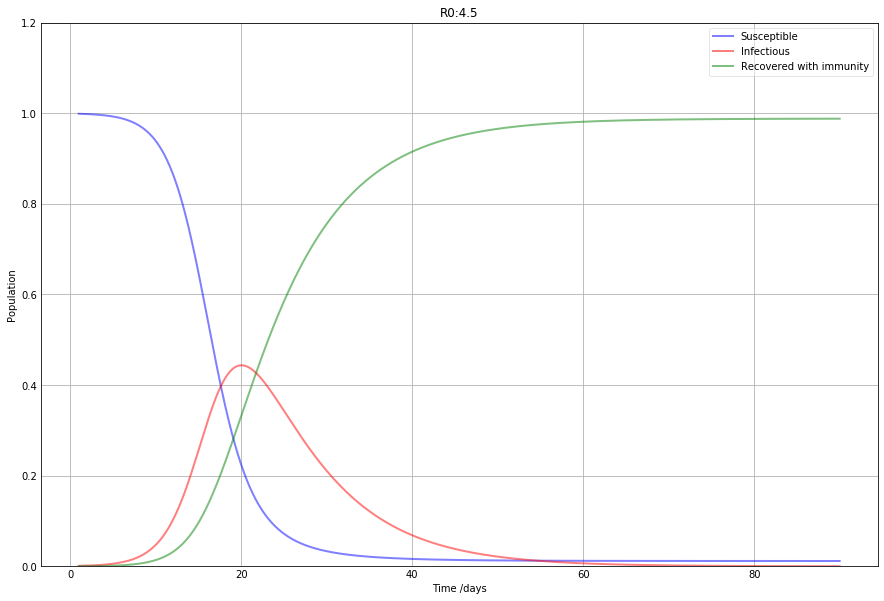

In [49]:
N = 1000
R0 = 4.5
beta = R0 * gamma
gamma = 1./8.1

init = [N-1, 1, 0]
params = beta, gamma
T = 90
dt = 1e-3

results = model(init, params, T, dt)
S = results[0]
I = results[1]
R = results[2]

t = np.linspace(1, T, int(T/dt))
fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectious')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.title('R0:' + str(R0))
plt.show()

## SEIR Model

In [50]:
def model(init, params, T, dt):
    beta, sigma, gamma = params
    S0, E0, I0, R0 = init
    N = S0 + E0 + I0 + R0
    
    S, E, I, R = [S0], [E0], [I0], [R0]
    for t in range(1, int(T/dt)):
        sigma_t = np.random.exponential(sigma)
        gamma_t = np.random.exponential(gamma)
        
        S_to_E = min(S[-1], (beta * S[-1] * I[-1] / N) * dt)
        E_to_I = min(E[-1], (sigma_t * E[-1]) * dt)
        I_to_R = min(I[-1], (gamma_t * I[-1]) * dt)
        
        next_S = S[-1] - S_to_E
        next_E = E[-1] + S_to_E - E_to_I
        next_I = I[-1] + E_to_I - I_to_R
        next_R = R[-1] + I_to_R
        
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        
    return np.stack([S, E, I, R])

/home/ridouane/anaconda3/envs/Computer-Vision-Python3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


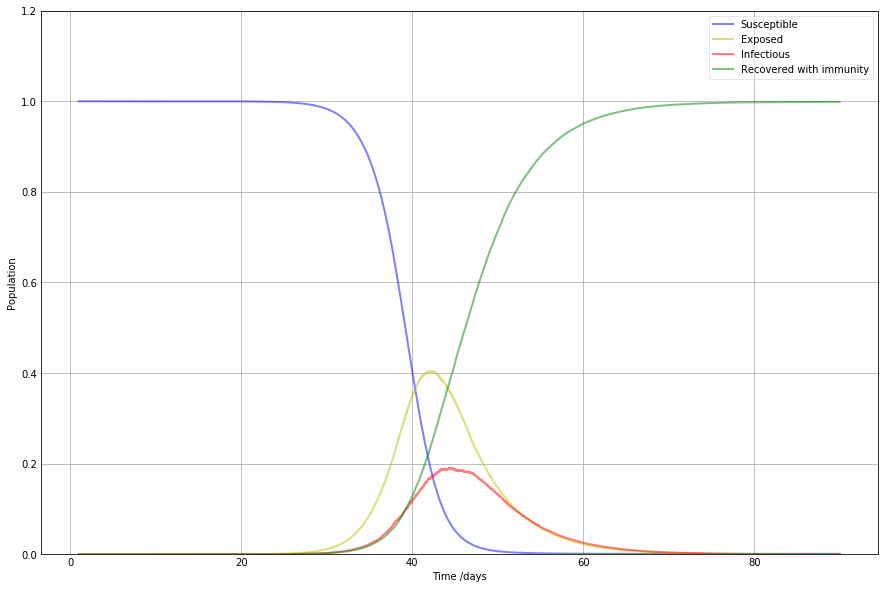

In [53]:
N = 11e6
R0 = 4.5
beta = R0 * (gamma + sigma)
sigma= 1 / 5.2
gamma = 1 / 2.9
T, dt = 90, 1e-3

init = [N-1, 1, 0, 0]
params = beta, sigma, gamma

results = model(init, params, T, dt)
S, E, I, R = results[0], results[1], results[2], results[3]

t = np.linspace(1, T, int(T/dt))
fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/N, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectious')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

## Stochastic SEIR Model

In [54]:
def model(init, params, T, dt, a):
    S0, E10, E20, I10, I20, R0, Q0, D0, C0 = init
    beta, sigma, gamma, kappa = params
    
    S, E1, E2, I1, I2, R, Q, D, C = [S0], [E10], [E20], [I10], [I20], [R0], [Q0], [D0], [C0]
    N = S0 + E10 + E20 + I10 + I20 + R0
    
    Z = np.random.normal(0, 1, int(T/dt))
    beta_t = beta
    
    for t in range(1, int(T/dt)):
        #beta_t = beta_t * (1. + np.sqrt(dt) * 0.4 * G[t])
        beta_t = beta_t * np.exp(np.sqrt(dt) * a * Z[t])
        sigma_t = np.random.exponential(sigma)
        gamma_t = np.random.exponential(gamma)
        kappa_t = np.random.exponential(kappa)
        
        S_to_E1 = min(S[-1], (beta_t * S[-1] * (I1[-1] + I2[-1]) / N) * dt)
        E1_to_E2 = min(E1[-1], (2 * sigma_t * E1[-1]) * dt)
        E2_to_I1 = min(E2[-1], (2 * sigma_t * E2[-1]) * dt)
        I1_to_I2 = min(I1[-1], (2 * gamma_t * I1[-1]) * dt)
        I2_to_R = min(I2[-1], (2 * gamma_t * I2[-1]) * dt)
        
        next_S = S[-1] - S_to_E1
        next_E1 = E1[-1] + S_to_E1 - E1_to_E2
        next_E2 = E2[-1] + E1_to_E2 - E2_to_I1
        next_I1 = I1[-1] + E2_to_I1 - I1_to_I2
        next_I2 = I2[-1] + I1_to_I2 - I2_to_R
        next_R = R[-1] + I2_to_R
        
        next_D = D[-1] + E2_to_I1 * np.exp(- gamma * kappa)
        next_Q = Q[-1] + E2_to_I1 * np.exp(- gamma * kappa) - kappa_t * Q[-1]
        next_C = C[-1] + kappa_t * Q[-1]
        
        S.append(next_S)
        E1.append(next_E1)
        E2.append(next_E2)
        I1.append(next_I1)
        I2.append(next_I2)
        R.append(next_R)
        
        D.append(next_D)
        Q.append(next_Q)
        C.append(next_C)
    
    return np.stack([S, E1, E2, I1, I2, R, Q, D, C])

/home/ridouane/anaconda3/envs/Computer-Vision-Python3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


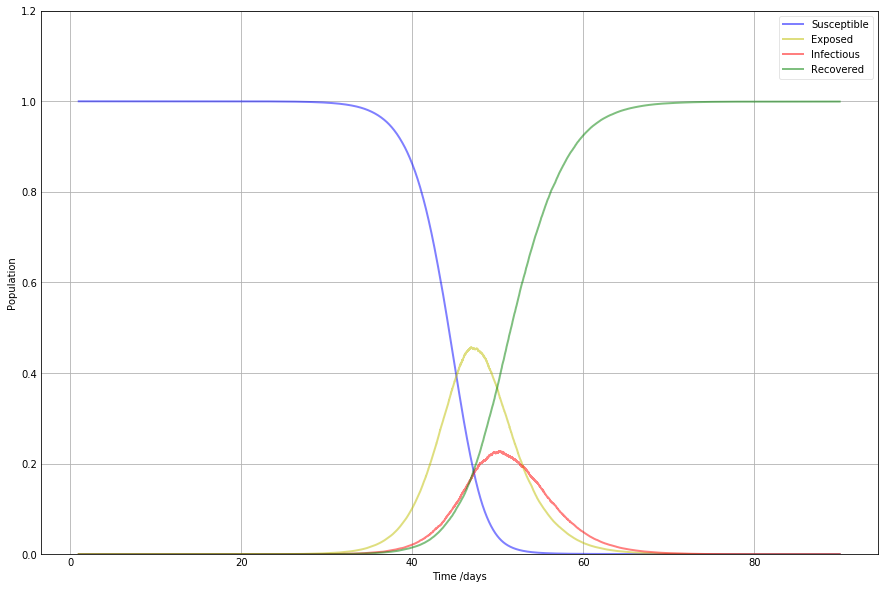

In [55]:
R0 = 4.5
a = 0.01

N = 11e6
beta = R0 * (gamma + sigma)
sigma= 1 / 5.2
gamma = 1 / 2.9
kappa = 1 / 6.1

T, dt = 90, 1e-3

init = [N-1, 1, 0, 0, 0,0, 0, 0, 0]
params = beta, sigma, gamma, kappa

results = model(init, params, T, dt, a)
S = results[0]
E = results[1:3].sum(axis=0)
I = results[3:5].sum(axis=0)
R = results[5]

t = np.linspace(1, T, int(T/dt))
fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/N, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectious')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

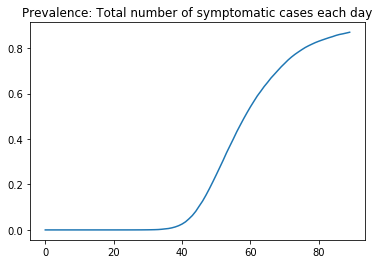

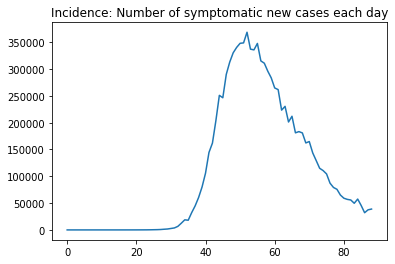

In [58]:
R0 = 4.5
a = 0.1

N = 11e6
beta = R0 * (gamma + sigma)
sigma= 1 / 5.2
gamma = 1 / 2.9
kappa = 1 / 6.1

T, dt = 90, 1e-0

init = [N-1, 1, 0, 0, 0,0, 0, 0, 0]
params = beta, sigma, gamma, kappa

confirmed_cases = []
for k in range(1000):
    results = model(init, params, T, dt, a)
    confirmed_cases.append(results[-2])

Y = np.mean(confirmed_cases, axis=0)
plt.title('Prevalence: Total number of symptomatic cases each day')
plt.plot(np.arange(0, T, dt), Y/N)
plt.show()

Z = Y[1:] - Y[:-1]
plt.title('Incidence: Number of symptomatic new cases each day')
plt.plot(np.arange(0, T, dt)[:-1], Z)
plt.show()

## Simulate a (Geometric) Brownian Motion

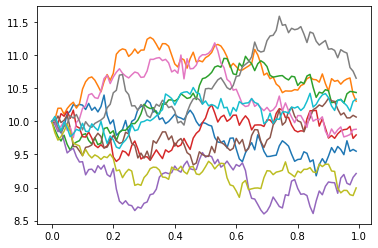

In [95]:
# Brownian Motion - Exact simulation
N, T, X0 = 100, 1., 10.
h = T / N
a = 0.4

for k in range(10):
    X = [X0]
    
    #Z = np.random.normal(0, 1, N)
    tmp = np.random.uniform(size=(N, 2))
    U1, U2 = tmp[:,0], tmp[:,1]
    Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    
    for i in range(N-1):
        X.append(X[-1] + np.sqrt(h) * Z[i])
    plt.plot(np.arange(0, T, h), X)
plt.show()

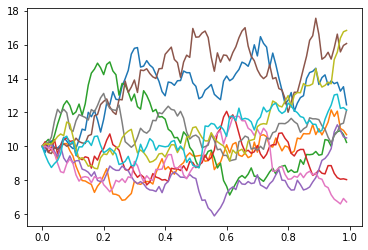

In [96]:
# Geometric Brownian Motion - Exact simulation
N, T, X0 = 100, 1., 10.
h = T / N
a = 0.4

for k in range(10):
    X = [X0]
    
    #Z = np.random.normal(0, 1, N)
    tmp = np.random.uniform(size=(N, 2))
    U1, U2 = tmp[:,0], tmp[:,1]
    Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    
    for i in range(N-1):
        X.append(X[-1] * np.exp(np.sqrt(h) * a * Z[i]))
    plt.plot(np.arange(0, T, h), X)
plt.show()

## Quasi-Monte Carlo

In [182]:
N = 1000

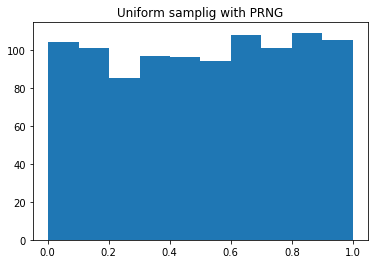

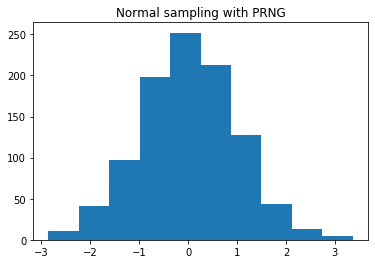

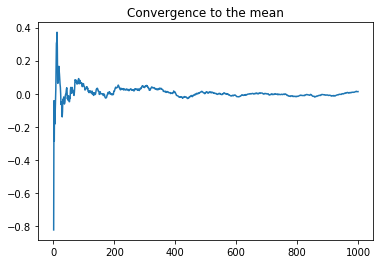

In [183]:
# Uniform sampling with Pseudo Random Number Generator (Mersenne Twister)
X = np.random.uniform(size=N)
plt.hist(X, bins=10)
plt.title('Uniform samplig with PRNG')
plt.show()

# Normal sampling with Pseudo Random Number Generator (Mersenne Twister)
tmp = np.random.uniform(size=(N, 2))
U1, U2 = tmp[:,0], tmp[:,1]
Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
plt.hist(Z, bins=10)
plt.title('Normal sampling with PRNG')
plt.show()

Y = np.cumsum(Z) / np.arange(1, len(Z)+1, 1)
plt.title('Convergence to the mean')
plt.plot(np.arange(1, len(Z)+1, 1), Y)
plt.show()

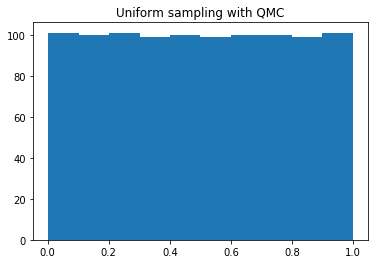

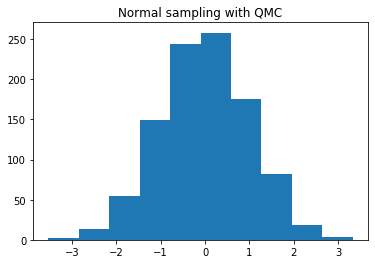

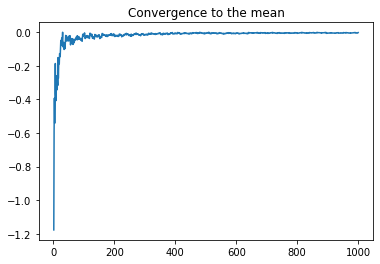

In [184]:
import sobol_seq

# Uniform sampling with Quasi Monte Carlo (Sobol sequence)
X = sobol_seq.i4_sobol_generate(1, N)
plt.hist(X, bins=10)
plt.title('Uniform sampling with QMC')
plt.show()

# Normal sampling with Quasi Monte Carlo (Sobol sequence)
tmp = sobol_seq.i4_sobol_generate(2, N)
U1, U2 = tmp[:,0], tmp[:,1]
Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
plt.hist(Z, bins=10)
plt.title('Normal sampling with QMC')
plt.show()

Y = np.cumsum(Z) / np.arange(1, len(Z)+1, 1)
plt.title('Convergence to the mean')
plt.plot(np.arange(1, len(X)+1, 1), Y)
plt.show()

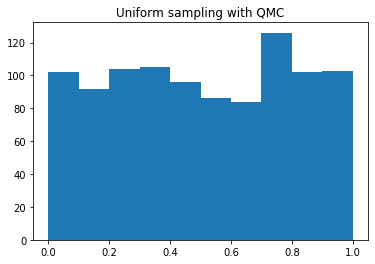

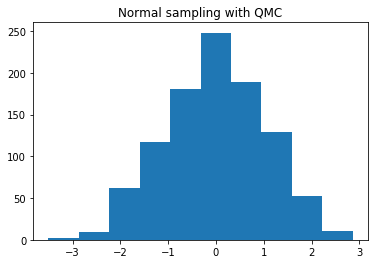

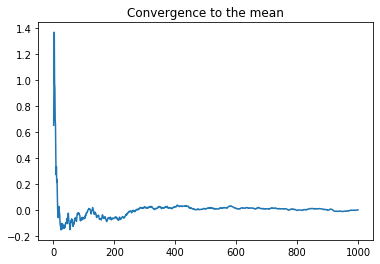

In [185]:
# Uniform sampling with Quasi Monte Carlo (Sobol sequence)
X = sobol_seq.i4_sobol_generate(1, N)
randomization = np.random.uniform(size=(N, 1))
X = (X + randomization) % 1
plt.hist(X, bins=10)
plt.title('Uniform sampling with QMC')
plt.show()

# Normal sampling with Quasi Monte Carlo (Sobol sequence)
tmp = sobol_seq.i4_sobol_generate(2, N)
randomization = np.random.uniform(size=(N, 2))
tmp = (tmp + randomization) % 1
U1, U2 = tmp[:,0], tmp[:,1]
Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
plt.hist(Z, bins=10)
plt.title('Normal sampling with QMC')
plt.show()

Y = np.cumsum(Z) / np.arange(1, len(Z)+1, 1)
plt.title('Convergence to the mean')
plt.plot(np.arange(1, len(X)+1, 1), Y)
plt.show()

## (Geometric) Brownian Motion + Quasi Monte Carlo

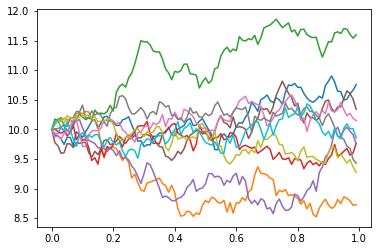

In [188]:
# Brownian Motion - Exact simulation
N, T, X0 = 100, 1., 10.
h = T / N
a = 0.4

for k in range(10):
    X = [X0]
    
    tmp = sobol_seq.i4_sobol_generate(2, N)
    randomization = np.random.uniform(size=(N, 2))
    tmp = (tmp + randomization) % 1
    U1, U2 = tmp[:,0], tmp[:,1]
    Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    
    for i in range(N-1):
        X.append(X[-1] + np.sqrt(h) * Z[i])
    plt.plot(np.arange(0, T, h), X)
plt.show()

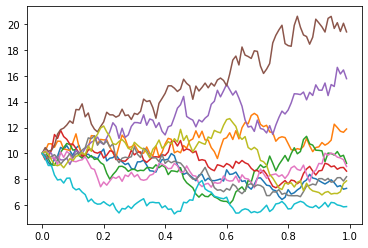

In [191]:
# Geometric Brownian Motion - Exact simulation
N, T, X0 = 100, 1., 10.
h = T / N
a = 0.4

for k in range(10):
    X = [X0]
    
    tmp = sobol_seq.i4_sobol_generate(2, N)
    randomization = np.random.uniform(size=(N, 2))
    tmp = (tmp + randomization) % 1
    U1, U2 = tmp[:,0], tmp[:,1]
    Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    
    for i in range(N-1):
        X.append(X[-1] * np.exp(np.sqrt(h) * a * Z[i]))
    plt.plot(np.arange(0, T, h), X)
plt.show()

## Stochastic SEIR Model with Quasi-Monte Carlo

In [201]:
def model(init, params, T, dt, a):
    S0, E10, E20, I10, I20, R0, Q0, D0, C0 = init
    beta, sigma, gamma, kappa = params
    
    S, E1, E2, I1, I2, R, Q, D, C = [S0], [E10], [E20], [I10], [I20], [R0], [Q0], [D0], [C0]
    N = S0 + E10 + E20 + I10 + I20 + R0
    
    beta_t = beta
    
    tmp = sobol_seq.i4_sobol_generate(2, int(T/dt))
    randomization = np.random.uniform(size=(int(T/dt), 2))
    tmp = (tmp + randomization) % 1
    U1, U2 = tmp[:,0], tmp[:,1]
    Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    
    for t in range(1, int(T/dt)):
        #beta_t = beta_t * (1. + np.sqrt(dt) * 0.4 * G[t])
        beta_t = beta_t * np.exp(np.sqrt(dt) * a * Z[t])
        sigma_t = np.random.exponential(sigma)
        gamma_t = np.random.exponential(gamma)
        kappa_t = np.random.exponential(kappa)
        
        S_to_E1 = min(S[-1], (beta_t * S[-1] * (I1[-1] + I2[-1]) / N) * dt)
        E1_to_E2 = min(E1[-1], (2 * sigma_t * E1[-1]) * dt)
        E2_to_I1 = min(E2[-1], (2 * sigma_t * E2[-1]) * dt)
        I1_to_I2 = min(I1[-1], (2 * gamma_t * I1[-1]) * dt)
        I2_to_R = min(I2[-1], (2 * gamma_t * I2[-1]) * dt)
        
        next_S = S[-1] - S_to_E1
        next_E1 = E1[-1] + S_to_E1 - E1_to_E2
        next_E2 = E2[-1] + E1_to_E2 - E2_to_I1
        next_I1 = I1[-1] + E2_to_I1 - I1_to_I2
        next_I2 = I2[-1] + I1_to_I2 - I2_to_R
        next_R = R[-1] + I2_to_R
        
        next_D = D[-1] + E2_to_I1 * np.exp(- gamma * kappa)
        next_Q = Q[-1] + E2_to_I1 * np.exp(- gamma * kappa) - kappa_t * Q[-1]
        next_C = C[-1] + kappa_t * Q[-1]
        
        S.append(next_S)
        E1.append(next_E1)
        E2.append(next_E2)
        I1.append(next_I1)
        I2.append(next_I2)
        R.append(next_R)
        
        D.append(next_D)
        Q.append(next_Q)
        C.append(next_C)
    
    return np.stack([S, E1, E2, I1, I2, R, Q, D, C])

/home/ridouane/anaconda3/envs/Computer-Vision-Python3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


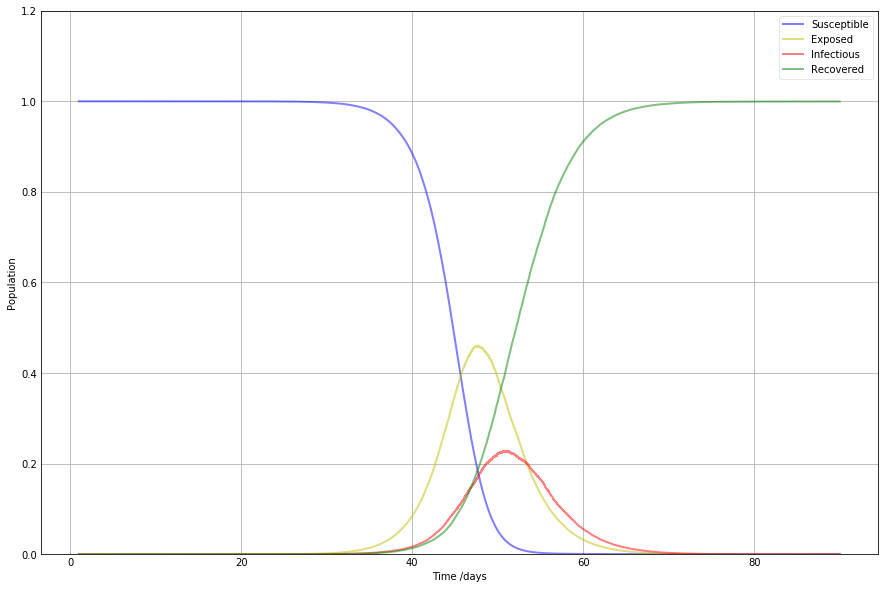

In [202]:
R0 = 4.5
a = 0.01

N = 11e6
sigma= 1. / 5.2
gamma = 1. / 2.9
kappa = 1. / 6.1
beta = R0 * (gamma + sigma)

T, dt = 90, 1e-3

init = [N-1, 1, 0, 0, 0,0, 0, 0, 0]
params = beta, sigma, gamma, kappa

results = model(init, params, T, dt, a)
S = results[0]
E = results[1:3].sum(axis=0)
I = results[3:5].sum(axis=0)
R = results[5]

t = np.linspace(1, T, int(T/dt))
fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/N, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectious')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

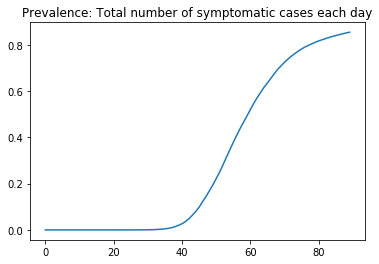

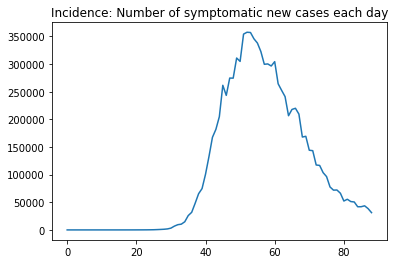

In [203]:
R0 = 4.5
a = 0.1

N = 11e6
beta = R0 * (gamma + sigma)
sigma= 1 / 5.2
gamma = 1 / 2.9
kappa = 1 / 6.1

T, dt = 90, 1e-0

init = [N-1, 1, 0, 0, 0,0, 0, 0, 0]
params = beta, sigma, gamma, kappa

confirmed_cases = []
for k in range(1000):
    results = model(init, params, T, dt, a)
    confirmed_cases.append(results[-2])

Y = np.mean(confirmed_cases, axis=0)
plt.title('Prevalence: Total number of symptomatic cases each day')
plt.plot(np.arange(0, T, dt), Y/N)
plt.show()

Z = Y[1:] - Y[:-1]
plt.title('Incidence: Number of symptomatic new cases each day')
plt.plot(np.arange(0, T, dt)[:-1], Z)
plt.show()